In [12]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns
import calendar

In [13]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="MS PMincho")
sns.set_context(font_scale=0.8)

In [14]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [15]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [16]:
co2flux_26 = xr.open_dataset('/Volumes/Untitled/Cropped_DataTransfer/co2flux/co2fluxUptakechng26.nc')

In [17]:
co2flux_70 = xr.open_dataset('/Volumes/Untitled/Cropped_DataTransfer/co2flux/co2fluxUptakechng70.nc')

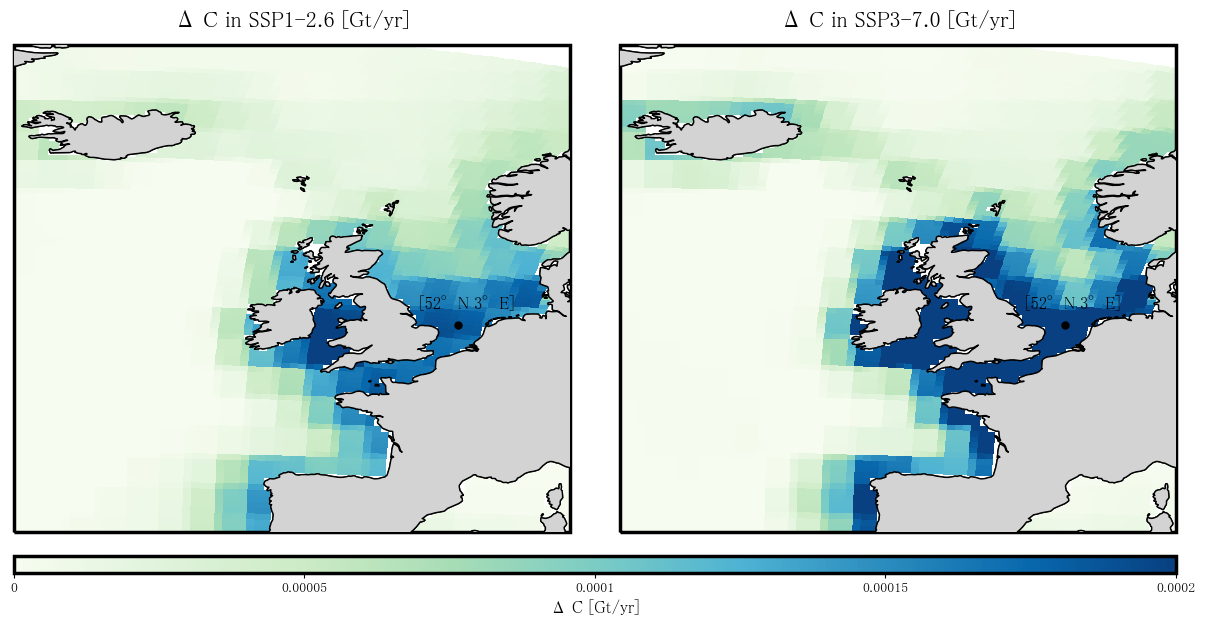

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im1 = co2flux_26.co2flux.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=0.0002,
        cmap="GnBu",
        add_colorbar=False
    )
    
im2 = co2flux_70.co2flux.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=0.0002,
        cmap="GnBu",
        add_colorbar=False
    )

axes = [ax1, ax2]

for ax in axes:
    ax.coastlines()
    ax.set_extent([-25, 10, 40, 70])
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')
    ax.plot(3, 53, "o", color='black', markersize=5)
    ax.text(0.5, 54,'[52°N 3°E]', fontsize=12, color='black')
for ax in axes: 
    if ax == ax1:
        ax.set_title("Δ C in SSP1-2.6 [Gt/yr]", fontsize=16, y=1.02)
    elif ax == ax2:
        ax.set_title("Δ C in SSP3-7.0 [Gt/yr]", fontsize=16, y=1.02)

cbar = plt.colorbar(im1, ax = [ax1, ax2], aspect = 70, pad=0.04, location='bottom', ticks=[0, 0.00005, 0.0001, 0.00015, 0.0002])
cbar.set_label('Δ C [Gt/yr]', fontsize=12)
cbar.ax.set_xticklabels(['0', '0.00005', '0.0001', '0.00015', '0.0002'])
cbar.ax.tick_params(labelsize=10)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/OAEseasonality/seasonality/figures/Cgt.png')

pass

In [19]:
co2flux_26.sum(['x','y'])

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    time     float64 0.0
Data variables:
    co2flux  float64 0.1779

In [20]:
co2flux_70.sum(['x','y'])

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    time     float64 0.0
Data variables:
    co2flux  float64 0.24